In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€ 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI') to ('30', '09', '2012', '24', '64', '15', '0.2', '67.3', '3.8', '16.5', '1.2', '4.8', '0.5')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bejaia Region Dataset   245 non-null    object
dtypes: object(1)
memory usage: 49.3+ KB


# Fixing the Data Set

- MultiIndex DataSet: Spliting index to get the proper data
- Mergeing 2 groups of data: The dataset includes 244 instances that regroup a data of two regions

### 1. MultiIndex

In [5]:
df = df.reset_index()

In [7]:
new_header = df.iloc[0]
new_header
df = df[1:]
df.columns = new_header
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [8]:
df.isnull().sum()

0
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### 2. Data Set Information:
The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into "fire" (138 classes) and "not fire" (106 classes) classes.

In [9]:
df[df['month'].isnull() == True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Above is the index of merge (common row for 2 dataset)


In [11]:
df.drop([123,124], axis=0, inplace=True)

In [12]:
df.shape

(244, 14)

#### 244 rows: 122 data records for each group

In [14]:
df[df['Classes  '].isnull() == True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### This is actually left shifted by 1 and merged into DC column

In [15]:
df.loc[168]['DC'] = 14.6
df.loc[168]['ISI'] = 9
df.loc[168]['BUI'] = 12.5
df.loc[168]['FWI'] = 10.4
df.loc[168]['Classes  '] = 'fire'

In [17]:
df.isnull().sum()

0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

#### Null Value fixed

### 3. Converting data to suitable datatype format

In [18]:
df_numerical = df.drop(columns='Classes  ')

In [19]:
df_numerical = df_numerical.apply(pd.to_numeric)

In [22]:
new_df = df_numerical
new_df['Classes'] = df['Classes  ']
new_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


In [28]:
new_df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object', name=0)

In [29]:
new_df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

#### fixing spacing issue of classes column

In [30]:
df = new_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [33]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## DataSet is fixed now for EDA

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


# EDA
1. Missing value detect
2. All numerical variables
3. Distributon of data
4. Categorical variables 
5. Outliers
6. Relationship between independent and dependent features
7. Correlations

### 1. Missing values detect

In [36]:
df.isnull().sum()

0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

### 2. All numerical variables

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 36.7+ KB


### 3. Distributon of data

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':' RH'}>,
        <AxesSubplot:title={'center':' Ws'}>,
        <AxesSubplot:title={'center':'Rain '}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

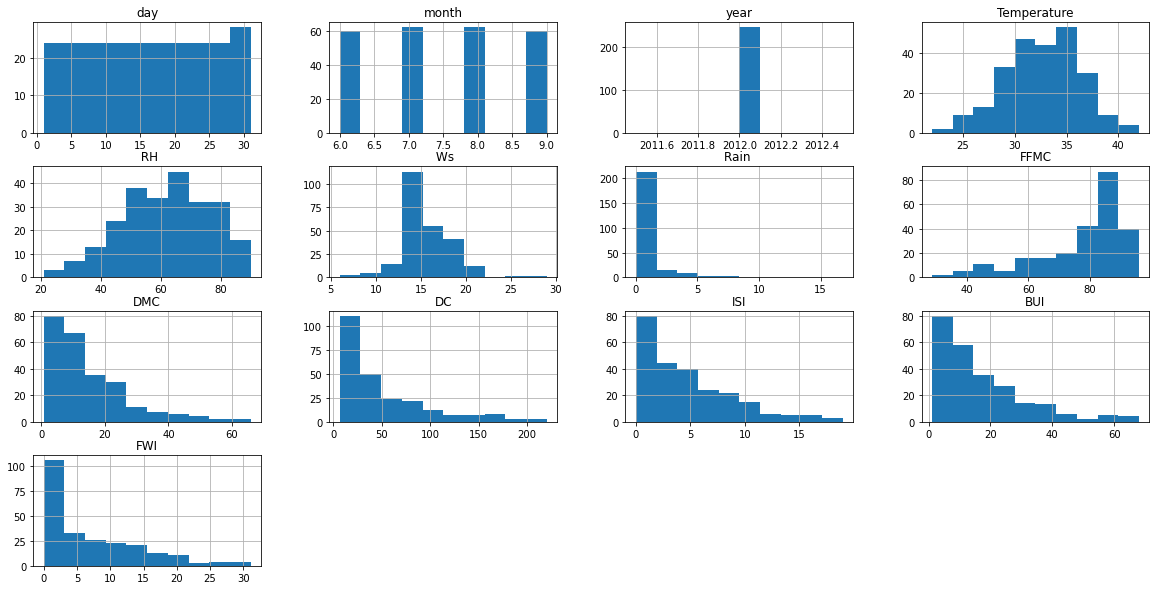

In [39]:
df.hist(figsize=(20,10))

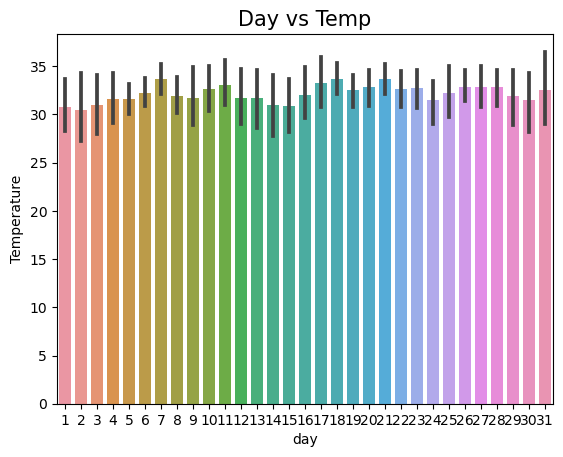

In [41]:
plt.style.use("default")
sns.barplot(x = df['day'], y = df['Temperature'], data = df)
plt.title('Day vs Temp', fontsize = 15)
plt.show()

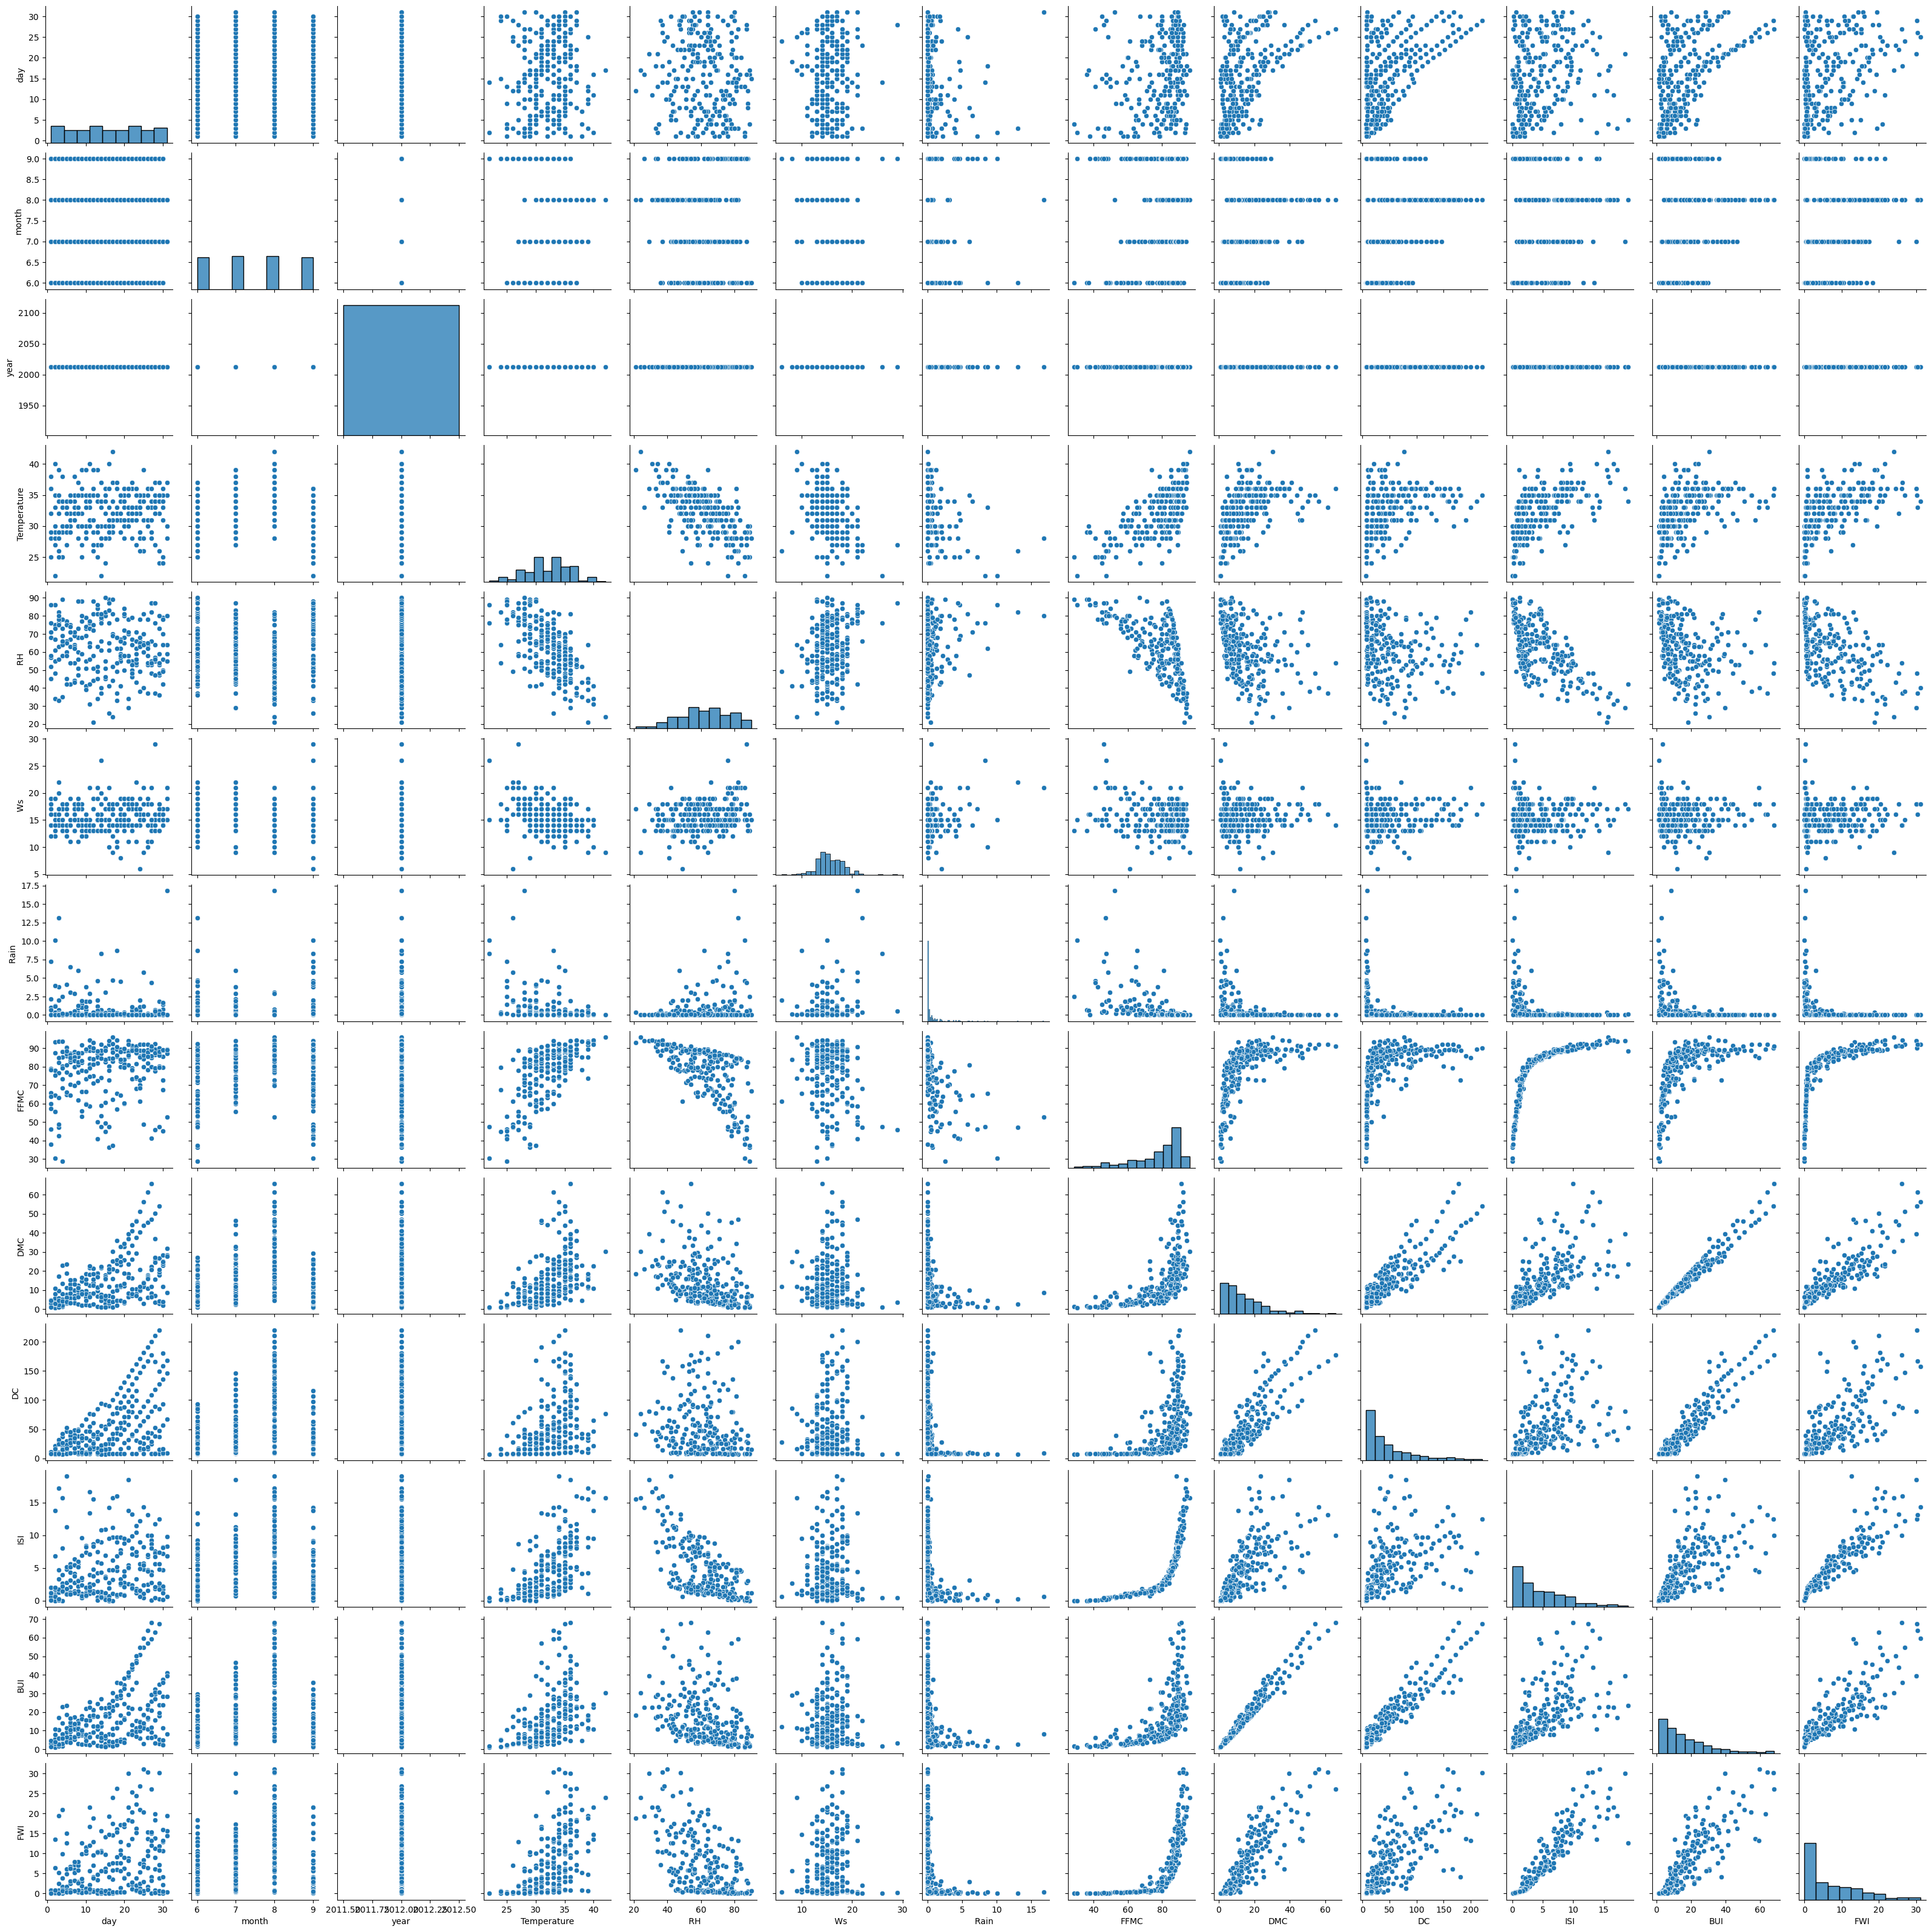

In [43]:
sns.pairplot(df)

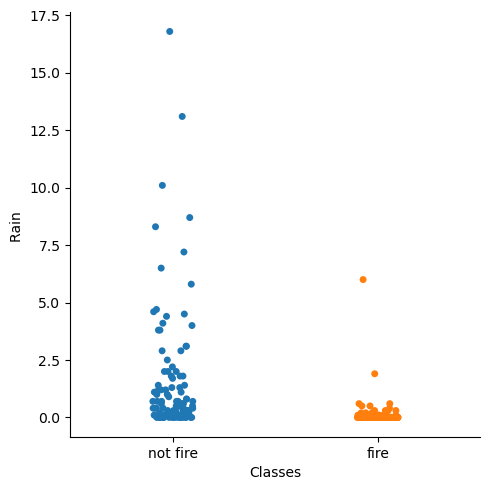

In [42]:
sns.catplot(x = 'Classes', y = 'Rain ', data = df)

<AxesSubplot:xlabel='0', ylabel='0'>

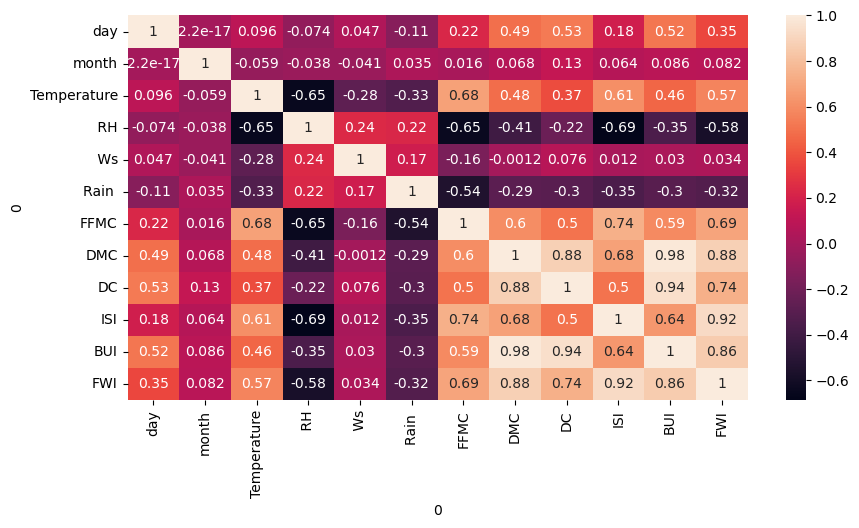

In [52]:
df_correlation = df.drop(columns=['year']).corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_correlation,annot=True)

## Removing the multicollinear features

In [55]:
## scaling the data while calculating vif score
def vif_score(data,col):
    y = data[col]
    X = data.drop([col],axis=1)
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X)
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
    vif["Features"] = X.columns
    return vif

In [57]:
vif_score(df.drop(columns='Classes'),'Temperature')

C:\Users\Chandan Kumar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF,Features
0,1.461282,day
1,1.058459,month
2,NaN,year
3,2.543142,RH
4,1.234574,Ws
5,1.548586,Rain
6,3.873942,FFMC
7,76.237982,DMC
8,25.120961,DC
9,23.181201,ISI


#### Lots of features with VIF Score > 10

In [59]:
df_copy = df.copy()

In [60]:
def remove_corr_features(corr,data,col):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    dataset_corr = data[selected_columns]
    return vif_score(dataset_corr,col),dataset_corr

In [61]:
## After removing correlated features
df_vif,df = remove_corr_features(df_correlation,df.drop(columns=['year','Classes']),'Temperature')
df_vif

,VIF,Features
0,1.457698,day
1,1.053942,month
2,2.503077,RH
3,1.233751,Ws
4,1.540776,Rain
5,3.412678,FFMC
6,6.878374,DMC
7,5.422927,DC
8,3.944158,ISI


#### Correlated features removed

In [63]:
df['Classes'] = df_copy['Classes']
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes
1,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire
2,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire
3,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire
4,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire
5,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire


## Outliers

<AxesSubplot:xlabel='0'>

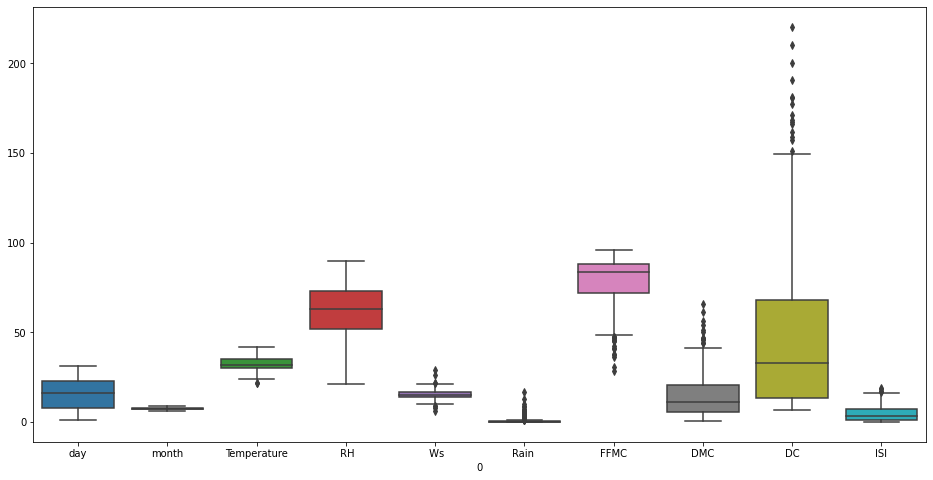

In [67]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df)

## Handling the Outliers Values

In [68]:
def outliers(data,col):
    sorted_data = data[col].sort_values(ascending=True)
    quantile1,quantile3 = np.percentile(sorted_data,[25,75])
    iqr = quantile3-quantile1
    lower_bound = quantile1 -(1.5 * iqr) 
    upper_bound = quantile3 +(1.5 * iqr) 
    outliers=[i for i in sorted_data if i<lower_bound or i>upper_bound]
    return outliers

In [70]:
for feature in df.drop(columns=['Classes']).columns:
    if len(outliers(df, feature)) > 0:
        print(feature, len(outliers(df, feature)))
        print(outliers(df, feature), len(outliers(df, feature))/244*100)
        print('----------------------------------------')

Temperature 2
[22, 22] 0.819672131147541
----------------------------------------
 Ws 8
[6, 8, 9, 9, 22, 22, 26, 29] 3.278688524590164
----------------------------------------
Rain  35
[1.3, 1.3, 1.4, 1.4, 1.7, 1.8, 1.8, 1.8, 1.9, 2.0, 2.0, 2.0, 2.2, 2.5, 2.9, 2.9, 3.1, 3.1, 3.8, 3.8, 4.0, 4.1, 4.4, 4.5, 4.6, 4.7, 5.8, 6.0, 6.5, 7.2, 8.3, 8.7, 10.1, 13.1, 16.8] 14.344262295081966
----------------------------------------
FFMC 16
[28.6, 30.5, 36.1, 37.3, 37.9, 40.9, 41.1, 42.6, 44.9, 45.0, 45.9, 46.0, 47.1, 47.4, 47.4, 47.4] 6.557377049180328
----------------------------------------
DMC 12
[43.9, 44.2, 45.6, 46.1, 46.6, 47.0, 50.2, 51.3, 54.2, 56.3, 61.3, 65.9] 4.918032786885246
----------------------------------------
DC 15
[151.3, 157.5, 159.1, 161.5, 166.0, 167.2, 168.2, 171.3, 177.3, 180.4, 181.3, 190.6, 200.2, 210.4, 220.4] 6.147540983606557
----------------------------------------
ISI 4
[16.6, 17.2, 18.5, 19.0] 1.639344262295082
----------------------------------------


### Flooring and clapping the outliers values

In [71]:
for feature in df.drop(columns=['Temperature', 'Classes']):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[feature]=np.where(df[feature]>upper_whisker,upper_whisker,np.where(df[feature]<lower_whisker,lower_whisker,df[feature]))

In [72]:
for feature in df.drop(columns=['Classes']).columns:
    if len(outliers(df, feature)) > 0:
        print(feature, len(outliers(df, feature)))
        print(outliers(df, feature), len(outliers(df, feature))/244*100)
        print('------------------------')

Temperature 2
[22, 22] 0.819672131147541
------------------------


<AxesSubplot:xlabel='0'>

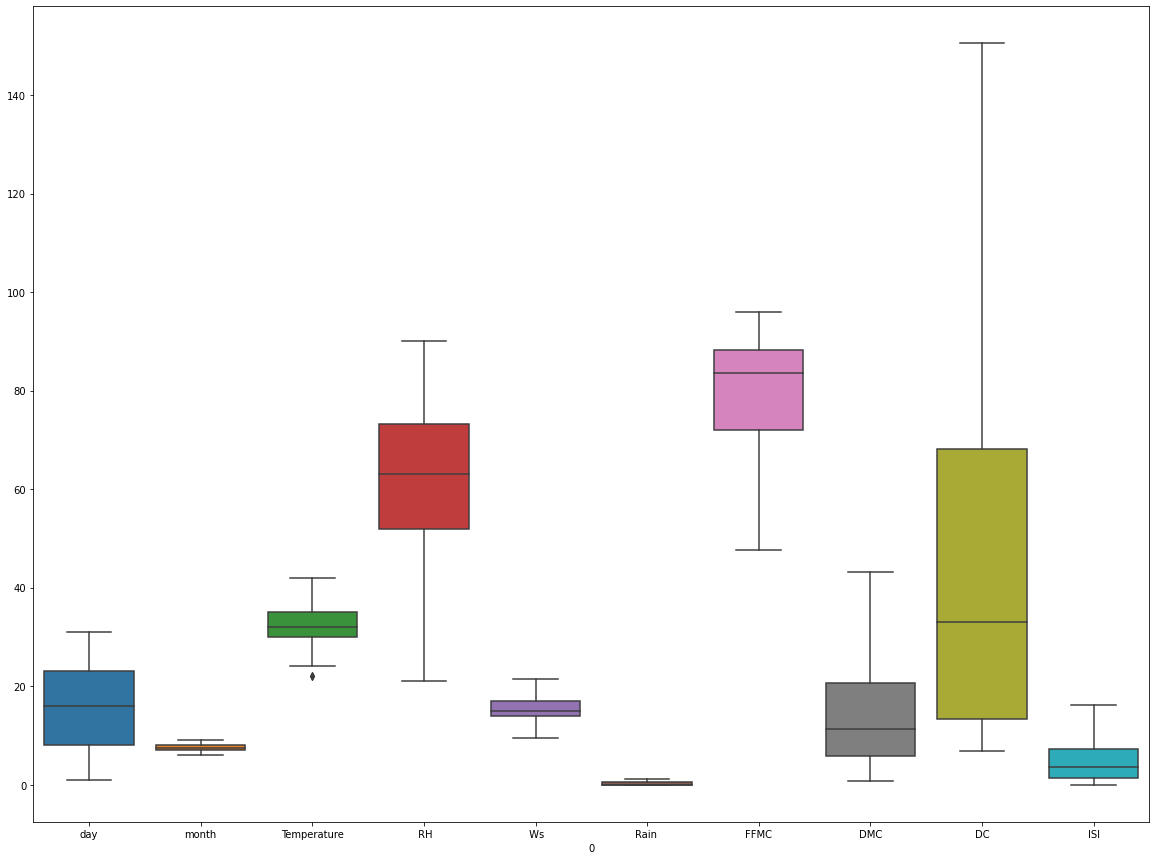

In [73]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.boxplot(data = df, ax = ax)

### Outliers handled

In [74]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

## Encoding the Categorical value of Classes

In [75]:
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [76]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes
1,1.0,6.0,29,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,0
2,2.0,6.0,29,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,0
3,3.0,6.0,26,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,0
4,4.0,6.0,25,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,0
5,5.0,6.0,27,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,0


<AxesSubplot:xlabel='0', ylabel='0'>

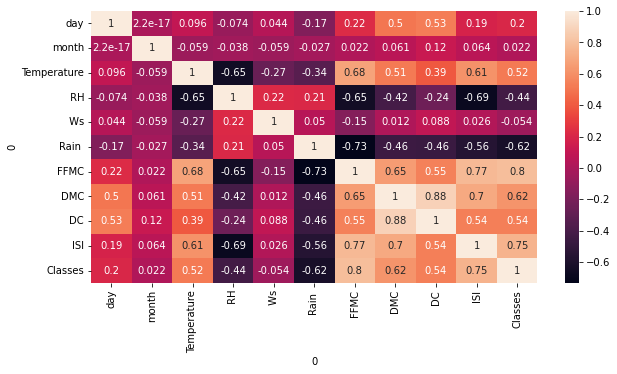

In [77]:
df_correlation = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_correlation,annot=True)

#### Day and month is not much related in predicting the Classes and Temperature. So we can remove it

In [78]:
df_final = df.copy()
df_final.drop(columns=['day', 'month'], inplace=True)
df_final.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes
1,29,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,0
2,29,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,0
3,26,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,0
4,25,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,0
5,27,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,0


In [79]:
df_final.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.475410,0.310861,78.288115,14.286066,47.625154,4.732377,0.565574
std,3.633843,14.884200,2.565081,0.464097,13.283493,11.194393,43.109643,4.070694,0.496700
min,22.000000,21.000000,9.500000,0.000000,47.737500,0.700000,6.900000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,1.000000
max,42.000000,90.000000,21.500000,1.250000,96.000000,43.175000,150.462500,16.150000,1.000000


# Model Building

In [82]:
x = df_final.drop(columns=['Temperature', 'Classes'])
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI
1,57.0,18.0,0.00,65.7000,3.4,7.6,1.3
2,61.0,13.0,1.25,64.4000,4.1,7.6,1.0
3,82.0,21.5,1.25,47.7375,2.5,7.1,0.3
4,89.0,13.0,1.25,47.7375,1.3,6.9,0.0
5,77.0,16.0,0.00,64.8000,3.0,14.2,1.2


In [83]:
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(x)

In [84]:
data_scaled

array([[-0.33247844,  0.98623771, -0.67119564, ..., -0.97445582,
        -0.93035857, -0.84492522],
       [-0.0631847 , -0.96702529,  2.0277453 , ..., -0.91179599,
        -0.93035857, -0.91877421],
       [ 1.35060746,  2.35352181,  2.0277453 , ..., -1.05501847,
        -0.94198074, -1.09108851],
       ...,
       [ 1.68722464,  2.35352181,  0.40838074, ..., -0.96550442,
        -0.92338526, -1.06647218],
       [-0.53444875,  0.98623771, -0.45528036, ..., -0.89389318,
        -0.75370153, -0.7464599 ],
       [ 0.13878561, -0.18572009, -0.23936509, ..., -0.9386502 ,
        -0.72348388, -0.86954155]])

In [85]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled

,0,1,2,3,4,5,6
0,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925
1,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774
2,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089
3,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937
4,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542
...,...,...,...,...,...,...,...
239,0.206109,-0.576373,-0.671196,0.536493,0.153421,-0.072642,-0.057203
240,1.687225,-0.185720,2.027745,-2.304621,-0.696962,-0.921061,-1.140321
241,1.687225,2.353522,0.408381,-2.304621,-0.965504,-0.923385,-1.066472
242,-0.534449,0.986238,-0.455280,0.106507,-0.893893,-0.753702,-0.746460


In [86]:
df_scaled.columns = df_final.drop(columns=['Temperature', 'Classes']).columns
df_scaled

,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,-0.332478,0.986238,-0.671196,-0.949599,-0.974456,-0.930359,-0.844925
1,-0.063185,-0.967025,2.027745,-1.047666,-0.911796,-0.930359,-0.918774
2,1.350607,2.353522,2.027745,-2.304621,-1.055018,-0.941981,-1.091089
3,1.821872,-0.967025,2.027745,-2.304621,-1.162435,-0.946630,-1.164937
4,1.013990,0.204933,-0.671196,-1.017491,-1.010261,-0.776946,-0.869542
...,...,...,...,...,...,...,...
239,0.206109,-0.576373,-0.671196,0.536493,0.153421,-0.072642,-0.057203
240,1.687225,-0.185720,2.027745,-2.304621,-0.696962,-0.921061,-1.140321
241,1.687225,2.353522,0.408381,-2.304621,-0.965504,-0.923385,-1.066472
242,-0.534449,0.986238,-0.455280,0.106507,-0.893893,-0.753702,-0.746460


In [87]:
y1 = df_final['Temperature']
y2 = df_final['Classes']

## Classification Model Training

In [88]:
from sklearn.model_selection import train_test_split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x,y1,test_size = 0.3 , random_state = 0)
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x,y2,test_size = 0.3 , random_state = 0)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score

In [93]:
## Training the model
models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

In [94]:
for model_name,model in models.items():
    model.fit(x_train2, y_train2)
    print(model_name,'trained')

C:\Users\Chandan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained
GaussianNB trained
KNeighborsClassifier trained
DecisionTreeClassifier trained
RandomForestClassifier trained
SVC trained


In [95]:
for model_name,model in models.items():
    
    print(model_name)
    print("Train Scores")
    y_pred = model.predict(x_train2)
    print("    Accuracy Score: {:.2f}".format(accuracy_score(y_train2, y_pred)))
    print("    F1 Score: {:.2f}".format(f1_score(y_train2, y_pred)))
    
    print("Test Scores")
    y_pred = model.predict(x_test2)
    print("    Accuracy Score: {:.2f}".format(accuracy_score(y_test2, y_pred)))
    print("    F1 Score: {:.2f}".format(f1_score(y_test2, y_pred)))

    print("_______________________________")

LogisticRegression
Train Scores
    Accuracy Score: 0.99
    F1 Score: 0.99
Test Scores
    Accuracy Score: 0.99
    F1 Score: 0.99
_______________________________
GaussianNB
Train Scores
    Accuracy Score: 0.96
    F1 Score: 0.96
Test Scores
    Accuracy Score: 0.96
    F1 Score: 0.96
_______________________________
KNeighborsClassifier
Train Scores
    Accuracy Score: 0.97
    F1 Score: 0.97
Test Scores
    Accuracy Score: 0.92
    F1 Score: 0.93
_______________________________
DecisionTreeClassifier
Train Scores
    Accuracy Score: 1.00
    F1 Score: 1.00
Test Scores
    Accuracy Score: 0.96
    F1 Score: 0.96
_______________________________
RandomForestClassifier
Train Scores
    Accuracy Score: 1.00
    F1 Score: 1.00
Test Scores
    Accuracy Score: 1.00
    F1 Score: 1.00
_______________________________
SVC
Train Scores
    Accuracy Score: 0.91
    F1 Score: 0.93
Test Scores
    Accuracy Score: 0.92
    F1 Score: 0.93
_______________________________


### Logistic Regression Giving best score for both Train and Test

In [100]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train2,y_train2)

C:\Users\Chandan Kumar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
file = "classification_model.sav"   # sav bytecode format
pickle.dump(logistic_regression_model, open(file, 'wb'))

## Regression Model Training

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [104]:
## Training the model
models={
    'Linear Regression': LinearRegression(),
    'Linear Regression(Ridge)': Ridge(),
    'Linear Regression(lasso)': Lasso(),
    'Support vector Regression': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}


In [105]:
for model_name,model in models.items():
    model.fit(x_train1, y_train1)
    print(model_name,'trained')

Linear Regression trained
Linear Regression(Ridge) trained
Linear Regression(lasso) trained
Support vector Regression trained
DecisionTreeRegressor trained
Random Forest Regressor trained


In [106]:
## Calculating RMSE score for each model

for model_name,model in models.items():
    y_pred = model.predict(x_test1)
    rmse = np.sqrt(np.mean((y_test1-y_pred)**2))
    print(model_name,"RMSE: {:.2f}".format(rmse))

Linear Regression RMSE: 2.41
Linear Regression(Ridge) RMSE: 2.42
Linear Regression(lasso) RMSE: 2.56
Support vector Regression RMSE: 2.58
DecisionTreeRegressor RMSE: 3.02
Random Forest Regressor RMSE: 2.41


In [107]:
## Calculating MAPE score for each model

for model_name,model in models.items():
    y_pred = model.predict(x_test1)
    mape = np.mean(np.abs((y_test1-y_pred)/y_test1))*100
    print(model_name,"MAPE: {:.3f}".format(mape))

Linear Regression MAPE: 6.217
Linear Regression(Ridge) MAPE: 6.232
Linear Regression(lasso) MAPE: 6.583
Support vector Regression MAPE: 6.582
DecisionTreeRegressor MAPE: 6.898
Random Forest Regressor MAPE: 5.869


In [108]:
for model_name,model in models.items():
    
    print(model_name)
    print("Train Scores")
    adj_r2 = 1 - (1-model.score(x_train1, y_train1))*(len(y_train1)-1)/(len(y_train1)-x_train1.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_train1, y_train1)))
    
    print("Test Scores")
    adj_r2 = 1 - (1-model.score(x_test1, y_test1))*(len(y_test1)-1)/(len(y_test1)-x_test1.shape[1]-1)
    print("    Accuracy Score: {:.2f}".format(adj_r2))
    print("    r2: {:.2f}".format(model.score(x_test1, y_test1)))

    print("_______________________________")

Linear Regression
Train Scores
    Accuracy Score: 0.54
    r2: 0.56
Test Scores
    Accuracy Score: 0.57
    r2: 0.61
_______________________________
Linear Regression(Ridge)
Train Scores
    Accuracy Score: 0.54
    r2: 0.56
Test Scores
    Accuracy Score: 0.56
    r2: 0.60
_______________________________
Linear Regression(lasso)
Train Scores
    Accuracy Score: 0.52
    r2: 0.54
Test Scores
    Accuracy Score: 0.51
    r2: 0.56
_______________________________
Support vector Regression
Train Scores
    Accuracy Score: 0.48
    r2: 0.50
Test Scores
    Accuracy Score: 0.50
    r2: 0.55
_______________________________
DecisionTreeRegressor
Train Scores
    Accuracy Score: 1.00
    r2: 1.00
Test Scores
    Accuracy Score: 0.32
    r2: 0.39
_______________________________
Random Forest Regressor
Train Scores
    Accuracy Score: 0.92
    r2: 0.92
Test Scores
    Accuracy Score: 0.57
    r2: 0.61
_______________________________


### Linear Regression giving best score and Least RMSE and MAPE error

In [109]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train1, y_train1)

LinearRegression()

In [110]:
file = "regression_model.sav"   # sav bytecode format
pickle.dump(linear_regression_model, open(file, 'wb'))